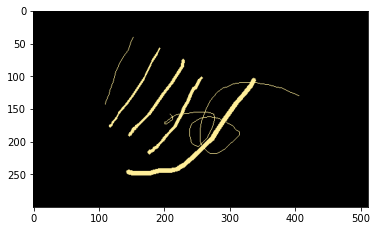

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

drawing = False
ix = 0
iy = 0
color = [0, 0, 0]  # Initialize color variable

# Adding Function Attached To Mouse Callback
def draw(event, x, y, flags, params):
    global ix, iy, drawing, color
    # Left Mouse Button Down Pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            # Get the current thickness value
            i_thick = cv2.getTrackbarPos('thickness', 'image')
            # Ensure the thickness is at least 1
            i_thick = max(i_thick, 1)
            # For Drawing Line
            cv2.line(img, pt1=(ix, iy), pt2=(x, y), color=tuple(color), thickness=i_thick)
            ix = x
            iy = y
    if event == cv2.EVENT_LBUTTONUP:
        drawing = False

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('thickness', 'image', 1, 5, nothing)

# Adding Mouse CallBack Event
cv2.setMouseCallback("image", draw)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    # get current positions of the trackbars
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    color = [b, g, r]  # Update color based on trackbar values

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])